## Perceptron Implementation

This code is designed to implement a perceptron for handling a classification problem. It serves as a training exercise to gain a better grasp of fundamental machine learning concepts. The primary focus is on utilizing the Torch framework and enhancing my understanding of it.


In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np

## Importing Essential Libraries

In this section, we import essential libraries that will be utilized throughout the code. The entire code is built on Torch elements, as I am using them to learn how to effectively utilize them.


In [13]:
class Perceptron(nn.Module):

    def __init__(self, input_size):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(input_size, 1)

    def forward(self, x):
        return torch.sigmoid(self.fc(x))

## Perceptron Implementation

In this section, we implement the `Perceptron` class. The class inherits from `nn.Module` to leverage the full range of powerful Torch functions used in neural networks. We initialize the class by invoking the parent constructor with `super`.

![Perceptron Idea](images/perceptronscheme.jpeg)



In [14]:
def train_split(X, y, test_size=0.2, random_seed=None):
    if random_seed is not None:
        torch.manual_seed(random_seed)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

    X_train = torch.tensor(X_train, dtype=torch.float32)
    X_test = torch.tensor(X_test, dtype=torch.float32)
    y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
    y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

    return X_train, X_test, y_train, y_test


## Data Splitting

This function divides the dataset into training and testing sets.

### Parameters:

- `X` (numpy.ndarray): Input data.
- `y` (numpy.ndarray): Labels associated with the data.
- `test_size` (float): Proportion of data to allocate for testing (default is 0.2).
- `random_seed` (int): Random seed for reproducibility (optional).

### Returns:

- `X_train` (numpy.ndarray): Training data.
- `X_test` (numpy.ndarray): Testing data.
- `y_train` (numpy.ndarray): Training labels.
- `y_test` (numpy.ndarray): Testing labels.


In [15]:
def accuracy(y_true, y_pred):
    y_pred = (y_pred > 0.5).float()
    accuracy = (y_pred == y_true).float().mean()
    return accuracy.item()

## Accuracy Calculation

This function calculates the classification accuracy.

### Parameters:

- `y_true` (numpy.ndarray): True labels.
- `y_pred` (numpy.ndarray): Predicted labels.

### Returns:

- `accuracy` (float): Classification accuracy.


## Perceptron Object Creation

In this part of the code, a Perceptron object is created with specified learning rate and the number of iterations. The model is trained on the training data (`X_train` and `y_train`), and predictions are made for the test data (`X_test`).

In [16]:
if __name__ == "__main__":
    seed = np.random.randint(100)
    X, y = datasets.make_blobs(
        n_samples=150, n_features=2, centers=2, cluster_std=1.6, random_state= seed)
    X_train, X_test, y_train, y_test = train_split(X, y, test_size=0.2, random_seed= seed)

    input_size = X_train.shape[1]
    model = Perceptron(input_size)

    criterion = nn.BCELoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    #TRAINING
    num_epochs = 1000
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

    #TESTING
    with torch.no_grad():
        predictions = model(X_test)
        test_accuracy = accuracy(y_test, predictions)

### Plotting Data Points for Classes A and B

The code then proceeds to plot data points for classes A and B.

Perceptron classification accuracy: 1.0


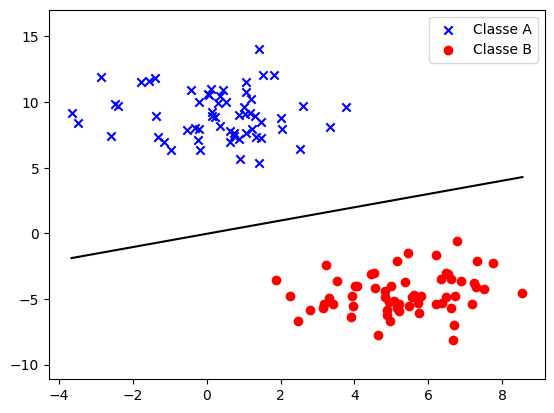

In [17]:

if __name__ == "__main__":
    print("Perceptron classification accuracy:", test_accuracy)

    x_classA = X_train[y_train.view(-1) == 0]
    x_classB = X_train[y_train.view(-1) == 1]

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    # Plotando "x" azuis para a classe 0
    plt.scatter(x_classA[:, 0], x_classA[:, 1], marker="x", c='blue', label="Classe A")

    # Plotando "o" vermelhas para a classe 1
    plt.scatter(x_classB[:, 0], x_classB[:, 1], marker="o", c='red', label="Classe B")

    w = list(model.parameters())[0][0].detach().numpy()
    b = list(model.parameters())[1][0].detach().numpy()

    x0_1 = torch.min(X_train[:, 0]).item()
    x0_2 = torch.max(X_train[:, 0]).item()

    x1_1 = (-w[0] * x0_1 - b) / w[1]
    x1_2 = (-w[0] * x0_2 - b) / w[1]

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

    ymin = torch.min(X_train[:, 1]).item()
    ymax = torch.max(X_train[:, 1]).item()
    ax.set_ylim([ymin - 3, ymax + 3])

    plt.legend()
    plt.show()
